In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [3]:
data1 = pd.read_csv('phone_user_review_file_1.csv',encoding='latin-1')

In [4]:
data1

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
374905,/cellphones/huawei-y3/,11/30/2015,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð² ÑÐ°Ð»Ð¾Ð½Ðµ ÐÐ¢Ð¡ ÐºÑÐ¿Ð¸Ð» Ð¿Ð¾ Ð°ÐºÑÐ...,NaN,Huawei Y3 U03
374906,/cellphones/huawei-y3/,11/9/2015,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð ÑÐµÐ»Ð¾Ð¼ Ð½ÐµÐ¿Ð»Ð¾Ñ Ð¾Ð¹ Ð´ÐµÐ²Ð°Ð¹Ñ Ð±...,NaN,Huawei Y3 U03
374907,/cellphones/huawei-y3/,9/27/2015,ru,ru,Yandex,market.yandex.ru,10.0,10.0,Ð Ð¾Ð±ÑÐµÐ¼ Ð¸ ÑÐµÐ»Ð¾Ð¼ Ð°Ð¿Ð¿Ð°ÑÐ°Ñ Ð½Ð...,NaN,Huawei Y3 U03
374908,/cellphones/huawei-y3/,9/25/2015,ru,ru,Yandex,market.yandex.ru,8.0,10.0,Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Ð´Ð»Ñ Ð½ÐµÑÑÐµÐ±Ð¾Ð²Ð°ÑÐµ...,NaN,Huawei Y3 U03


In [5]:
data2 = pd.read_csv('phone_user_review_file_2.csv',encoding='latin-1')
data2

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
...,...,...,...,...,...,...,...,...,...,...,...
114920,/cellphones/motorola-moto-g-4-plus/,8/19/2016,en,in,Amazon,amazon.in,2.0,10.0,It's getting problem when both sim working tog...,raj agrawal,"Motorola Moto G Plus, 4th Gen (White, 32 GB)"
114921,/cellphones/motorola-moto-g-4-plus/,8/18/2016,en,in,Amazon,amazon.in,2.0,10.0,Hopeless phone. Not at all user friendly. Woul...,Amazon Customer,"Motorola Moto G Plus, 4th Gen (White, 32 GB)"
114922,/cellphones/motorola-moto-g-4-plus/,8/18/2016,en,in,Amazon,amazon.in,10.0,10.0,Very nice phone.,Amazon Customer,"Motorola Moto G Plus, 4th Gen (White, 32 GB)"
114923,/cellphones/motorola-moto-g-4-plus/,8/18/2016,en,in,Amazon,amazon.in,8.0,10.0,Over all good phone . Give all the specificati...,Amazon Customer,"Motorola Moto G Plus, 4th Gen (White, 32 GB)"


In [6]:
data3 = pd.read_csv('phone_user_review_file_3.csv',encoding='latin-1')
data3

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."
...,...,...,...,...,...,...,...,...,...,...,...
312956,/cellphones/samsung-galaxy-s-iii/,1/23/2014,de,de,Yopi,yopi.de,10.0,10.0,Ein Disney- Meisterwerk fÃ¼r jung und alt! Zei...,burnson,Samsung Galaxy Express I8730
312957,/cellphones/samsung-galaxy-s-iii/,1/23/2014,de,de,Yopi,yopi.de,NaN,NaN,Nachdem ich mir einen neuen 3D fÃ¤higen Fernse...,Comflag,Samsung Galaxy Express I8730
312958,/cellphones/samsung-galaxy-s-iii/,1/22/2014,ru,ru,Yandex,market.yandex.ru,8.0,10.0,ÐÐ¾ Ð¿Ð¾Ð²Ð¾Ð´Ñ Ð°ÐºÐºÑÐ¼ÑÐ»ÑÑÐ¾ÑÐ°. Ð...,NaN,Samsung Galaxy S III GT-I9300 16Gb
312959,/cellphones/samsung-galaxy-s-iii/,1/22/2014,pt,br,Submarino,submarino.com.br,10.0,10.0,Ã³timo primeira linha acho que todo mundo gost...,magda vanessa ferreira,Samsung Smartphone Samsung Galaxy S III I9300 ...


In [7]:
data4 = pd.read_csv('phone_user_review_file_4.csv',encoding='latin-1')
data4

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
...,...,...,...,...,...,...,...,...,...,...,...
98279,/cellphones/zte-grand-s-flex/,3/1/2016,de,de,Amazon,amazon.de,2.0,10.0,Dieses Handy macht kein Spa??. Die Wlan Verbin...,Anja Jentsch,"ZTE Grand S Flex Smartphone (12,7 cm (5 Zoll) ..."
98280,/cellphones/zte-grand-s-flex/,31/12/2015,de,de,Amazon,amazon.de,4.0,10.0,Das ZTE Grand S Flex begeistert am Anfang durc...,Daniel Winkler,"ZTE Grand S Flex Smartphone (12,7 cm (5 Zoll) ..."
98281,/cellphones/zte-grand-s-flex/,20/12/2015,de,de,Amazon,amazon.de,2.0,10.0,Das Smartphone h??lt in meinem Falle NICHT was...,Amazon Kunde,"ZTE Grand S Flex Smartphone (12,7 cm (5 Zoll) ..."
98282,/cellphones/zte-grand-s-flex/,24/11/2015,de,de,Amazon,amazon.de,10.0,10.0,Dieses Smartphone habe ich letztes Jahr meinem...,Jens D.,"ZTE Grand S Flex Smartphone (12,7 cm (5 Zoll) ..."


In [8]:
data5 = pd.read_csv('phone_user_review_file_5.csv',encoding='latin-1')
data5

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black
...,...,...,...,...,...,...,...,...,...,...,...
350211,/cellphones/sony-ericsson-z710i/,8/7/2006,fr,fr,GraphMobile,graphmobile.com,10.0,10.0,Pour info il est sur amazon.de a 212.99â¬ s'i...,NaN,Sony-Ericsson Z710i
350212,/cellphones/sony-ericsson-z710i/,8/5/2006,fr,fr,GraphMobile,graphmobile.com,9.0,10.0,HabituÃ© Ã samsung sony nous sort 1 jolie cla...,NaN,Sony-Ericsson Z710i
350213,/cellphones/sony-ericsson-z710i/,7/19/2006,fr,fr,GraphMobile,graphmobile.com,10.0,10.0,"Pour les gens qui ne regarde pas Il fait mp3, ...",NaN,Sony-Ericsson Z710i
350214,/cellphones/sony-ericsson-z710i/,7/9/2006,fr,fr,GraphMobile,graphmobile.com,9.0,10.0,C vrai que sans le mp3 c moyen...,NaN,Sony-Ericsson Z710i


In [9]:
data6 = pd.read_csv('phone_user_review_file_6.csv',encoding='latin-1')
data6

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct
...,...,...,...,...,...,...,...,...,...,...,...
163832,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
163833,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
163834,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
163835,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy


In [10]:
# Q 1 A

In [11]:
reviews = pd.concat([data1, data2, data3, data4, data5, data6], ignore_index=True, sort=False)

In [12]:
reviews.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [13]:
reviews.tail()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1415128,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
1415129,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
1415130,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
1415131,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy
1415132,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,sc...",michaelawr,Alcatel Club Plus Handy


In [14]:
# Q1 B

In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


- Except score and score_max(which are of float type) remaining features are of object datatype.
- Date is a numerical column but represented as object datatype.
- score, score_max, extract, author seems to have null values.

 Statistical five point summary

In [16]:
reviews.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


In [17]:
reviews.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

Percentage of missing values :-

In [18]:
percent_missing = reviews.isnull().sum() * 100 / len(reviews)

In [19]:
percent_missing

phone_url    0.000000
date         0.000000
lang         0.000000
country      0.000000
source       0.000000
domain       0.000000
score        4.486433
score_max    4.486433
extract      1.368140
author       4.466153
product      0.000071
dtype: float64

-Thus three features(score, score_max, author) have approx 4.5% missing values 'score' and 'score_max' have exactly same number of missing values(63489). Extract feature has 1.36% missing values.

Unique values :-

In [20]:
print('Number of unique values in each feature: \n',reviews.nunique())

Number of unique values in each feature: 
 phone_url       5556
date            7728
lang              22
country           42
source           331
domain           384
score             86
score_max          1
extract      1321353
author        801103
product        61313
dtype: int64


All column except score_max(has only one value for all the rows) has different unique values

Exploring data :-

In [21]:
# Top 10 Non-english users
reviews[reviews['lang']!='en']['author'].value_counts(ascending=False)[:10]

Cliente Amazon        19276
e-bit                  8663
Client d'Amazon        7613
Amazon Kunde           4735
Amazon Customer        2713
einer Kundin           2610
einem Kunden           1898
unknown                1718
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ     1070
Ð¡ÐµÑÐ³ÐµÐ¹            904
Name: author, dtype: int64

In [22]:
# Top 10 Non-english products
reviews[reviews['lang']!='en']['product'].value_counts(ascending=False)[:10]

Huawei P8lite zwart / 16 GB                                                                                                                                                                  2707
Samsung Galaxy Express I8730                                                                                                                                                                 2686
Samsung Galaxy S6 zwart / 32 GB                                                                                                                                                              2345
Nokia 5800 XpressMusic                                                                                                                                                                       1996
Nokia N95                                                                                                                                                                                    1848
Huawei P9 Lite Smartphone, LTE

In [23]:
# print the frequency count of phone_url column
reviews['phone_url'].value_counts(ascending=False).head(50)

/cellphones/samsung-galaxy-s-iii/                                 17093
/cellphones/apple-iphone-5s/                                      16379
/cellphones/samsung-galaxy-s6/                                    16145
/cellphones/samsung-galaxy-s5/                                    16082
/cellphones/samsung-galaxy-s7-edge/                               15917
/cellphones/motorola-moto-g/                                      14476
/cellphones/samsung-galaxy-s7-789999/                             13488
/cellphones/samsung-i9500-galaxy-s-iv/                            13161
/cellphones/huawei-p8-lite/                                       12629
/cellphones/lenovo-vibe-k4-note/                                   9662
/cellphones/samsung-galaxy-s4-mini-gt-i9190-gt-i9192-dual-sim/     9027
/cellphones/samsung-galaxy-s6-edge-sm-g925f/                       8844
/cellphones/apple-iphone-4s/                                       8602
/cellphones/samsung-galaxy-s3-mini/                             

In [24]:
# frequency count of 'product' column for 'samsung-galaxy-s-iii' type phone
reviews[reviews["phone_url"]=='/cellphones/samsung-galaxy-s-iii/'][['product']].value_counts().head(15)

product                                                                                                                                         
Samsung Galaxy Express I8730                                                                                                                        2685
Samsung Galaxy S III 16GB (Virgin Mobile)                                                                                                            730
Samsung Galaxy S III                                                                                                                                 689
Samsung Galaxy S III 16GB (Straight Talk)                                                                                                            556
Samsung Galaxy S III i9300 Smartphone 16 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) schwarz     381
Samsung Galaxy S III 16GB (Boost Mobile)                                                  

In [25]:
# frequency count of 'product' column for 'apple-iphone-5s' type phone
reviews[reviews["phone_url"]=='/cellphones/apple-iphone-5s/'][['product']].value_counts().head(15)

product                                                                          
Apple iPhone 5s (Silver, 16GB)                                                       1603
Apple iPhone 5s 16GB (ÑÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹)                                        1355
Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray                            1273
Apple iPhone 5s (Gold, 16GB)                                                          682
Apple iPhone 5s 16GB (ÑÐµÑÑÐ¹ ÐºÐ¾ÑÐ¼Ð¾Ñ)                                        592
iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED                                        434
Apple iPhone 5S (Silver, 16 GB)                                                       429
Sim Free Apple iPhone 5S 16GB Mobile Phone - Space Grey                               349
Apple iPhone 5S 16Gb                                                                  326
Sim Free Apple iPhone 5S 16GB Mobile Phone - Silver                                   286
Apple iPhone 5s 16

In [26]:
# frequency count of 'product' column for 'samsung-galaxy-s6' type phone
reviews[reviews["phone_url"]=='/cellphones/samsung-galaxy-s6/'][['product']].value_counts().head(15)

product                                                                                                                             
Samsung Galaxy S6 zwart / 32 GB                                                                                                         2345
Samsung Galaxy S6 32GB (AT&T)                                                                                                            979
Samsung Galaxy S6 32GB (Sprint)                                                                                                          935
Samsung Galaxy S6 32GB (Verizon)                                                                                                         919
Samsung Galaxy S6 wit / 32 GB                                                                                                            801
Samsung Galaxy S6 32GB (T-Mobile)                                                                                                        736
Samsung Galaxy S6    

In [27]:
# frequency count of 'product' column for 'samsung-galaxy-s5' type phone
reviews[reviews["phone_url"]=='/cellphones/samsung-galaxy-s5/'][['product']].value_counts().head(15)

product                                                                                                   
Samsung Galaxy S5 16GB (Verizon)                                                                              1432
Samsung Galaxy S5 16GB (T-Mobile)                                                                             1165
Samsung Galaxy S5 16GB (AT&T)                                                                                 1079
Smartphone Samsung Galaxy S5 SM-G900                                                                           671
Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 cm) Touch-Display, 16 GB Speicher, Android 4.4) electric blue     664
Samsung Galaxy S5 SM-G900T 4G LTE 16GB Smartphone, Black (T-Mobile)                                            513
Samsung Galaxy S5 goud / 16 GB                                                                                 480
Samsung Galaxy S5 16GB (Sprint)                                                         

In [28]:
reviews['phone'] = reviews['phone_url'].str.split("/").apply(lambda col: col[2]).replace('-', ' ', regex=True)
reviews['product'] = reviews['phone']
reviews['phone'].unique()

array(['samsung galaxy s8', 'samsung galaxy s6 edgeplus',
       'samsung galaxy s8 plus', ..., 'siemens c10', 'maxon mx 3204',
       'alcatel ot club_1187'], dtype=object)

In [29]:
reviews['product'].shape

(1415133,)

In [30]:
revs1 = reviews.copy()

In [31]:
reviews['phone'] = reviews['phone_url'].str.split("/").apply(lambda col: col[2]).replace('-', ' ', regex=True)
reviews['product'] = reviews['phone']
reviews['phone'].unique()

array(['samsung galaxy s8', 'samsung galaxy s6 edgeplus',
       'samsung galaxy s8 plus', ..., 'siemens c10', 'maxon mx 3204',
       'alcatel ot club_1187'], dtype=object)

In [32]:
unknowns = ['Anonymous','einer Kundin','einem Kunden', 'unknown','Anonymous ']
reviews['author'].replace(to_replace = unknowns, 
                          value = 'Anonymous', 
                          inplace=True)

In [33]:
users = reviews['author'].value_counts(dropna=False)[:10]
print('Distribution of number of ratings per user(Clipped at 10): \n',users)

Distribution of number of ratings per user(Clipped at 10): 
 Amazon Customer       76978
NaN                   63202
Cliente Amazon        19304
Anonymous             10457
e-bit                  8663
Client d'Amazon        7716
Amazon Kunde           4750
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ     1071
David                  1016
Ð¡ÐµÑÐ³ÐµÐ¹            904
Name: author, dtype: int64


In [34]:
print('Uniqe values in the "score" feature: \n',reviews.score.unique())

Uniqe values in the "score" feature: 
 [10.   6.   9.2  4.   8.   2.   9.6  7.2  6.8  9.   8.3  8.8  8.4  5.3
  7.   6.4  7.6  nan  5.2  3.2  4.4  2.8  5.6  3.6  4.8  1.   5.   3.
  2.4  9.3  8.5  9.5  6.5  5.5  9.8  8.2  8.6  7.8  9.4  6.6  6.2  7.5
  9.9  2.7  8.7  6.7  3.3  7.7  7.3  9.7  6.3  7.4  5.7  4.7  4.3  5.8
  4.2  4.5  2.2  5.4  7.9  3.5  4.6  3.7  2.5  3.4  7.1  8.1  1.2  1.4
  3.8  9.1  2.6  1.6  1.7  1.5  1.8  2.3  6.1  5.9  1.3  0.2  0.4  8.9
  6.9  0.6  4.9]


In [35]:
print('Number of duplicate rows: ', reviews.duplicated().sum())

Number of duplicate rows:  24877


Making a copy of original data

In [36]:
revs1 = reviews.copy()

In [37]:
# Q1 G

In [38]:
relevant_features=['author','product','score']

Irrelvant features = ['phone url','date','lang','country','source','domain','score_max','extract']

Remove irrelevant features

In [39]:
revs1 = revs1.loc[:,relevant_features]
print(f'revs1 Shape after removing irrelevant features: Rows: {revs1.shape[0]} and Columns: {revs1.shape[1]}\n')

revs1 Shape after removing irrelevant features: Rows: 1415133 and Columns: 3



In [40]:
# Q1 C

Round-off score feature to nearest integer

In [41]:
revs1['score'] = revs1['score'].round(0).astype('Int64')
print('Round-off: Unique values in the "score" feature(after rounding-off): \n',list(revs1.score.unique()))

Round-off: Unique values in the "score" feature(after rounding-off): 
 [10, 6, 9, 4, 8, 2, 7, 5, <NA>, 3, 1, 0]


In [42]:
# Q1 D

Imputing the missing values

In [43]:
revs1['score'] = revs1['score'].fillna(revs1['score'].median())
print('Imputation of "score"  with median and "author" with "Anonymous"')

Imputation of "score"  with median and "author" with "Anonymous"


In [44]:
revs1.dropna(inplace=True)
revs1 = revs1[revs1["author"] != 'Anonymous']
print(f'revs1 Shape(after removing missing values): Rows: {revs1.shape[0]} and Columns: {revs1.shape[1]}\n')

revs1 Shape(after removing missing values): Rows: 1341474 and Columns: 3



In [45]:
# Q1 E

Removing duplicates

In [46]:
revs1 = revs1.drop_duplicates()
print(f'revs1 Shape(after removing duplicates): Rows: {revs1.shape[0]} and Columns: {revs1.shape[1]}\n')

revs1 Shape(after removing duplicates): Rows: 1154026 and Columns: 3



In [47]:
# Q1 F

In [48]:
revs_1m = revs1.sample(n=1000000, random_state = 612)
print(f'revs2 Shape: Rows: {revs_1m.shape[0]} and Columns: {revs_1m.shape[1]}\n')

revs2 Shape: Rows: 1000000 and Columns: 3



In [49]:
# Q1 G

Done in above steps

In [50]:
# Q2 A

In [51]:
print('Most rated features:- \n',revs_1m['product'].value_counts().head())

Most rated features:- 
 samsung galaxy s5         11429
samsung galaxy s6         11046
motorola moto g           10382
samsung galaxy s7 edge    10359
apple iphone 5s           10281
Name: product, dtype: int64


In [52]:
# Q2 B

In [53]:
print('Users with highest number of reviews: \n',revs_1m['author'].value_counts().head())

Users with highest number of reviews: 
 Amazon Customer    4816
Cliente Amazon     1663
Amazon Kunde       1179
Client d'Amazon     975
David               558
Name: author, dtype: int64


In [54]:
# Q2 C

Products having more than 50 ratings

In [55]:
product50 = revs1['product'].value_counts()
product50 = product50[product50>50].index.tolist() 
print('Number of products with >50 rating: ', len(product50))

Number of products with >50 rating:  2496


Users who have given more than 50 ratings

In [56]:
author50 = revs1['author'].value_counts()
author50 = author50[author50>50].index.tolist() 
print('Number of authors who have given >50 rating: ', len(author50))

Number of authors who have given >50 rating:  805


In [57]:
revs_50 = revs1[(revs1['author'].isin(author50)) & (revs1['product'].isin(product50))]
print(f'\nrevs_50: Rows: {revs_50.shape[0]} and Columns: {revs_50.shape[1]}\n')
del author50, product50
revs_50.head()


revs_50: Rows: 95672 and Columns: 3



,author,product,score
66,James,samsung galaxy s8,10
161,Paul,samsung galaxy s8,10
167,Robert,samsung galaxy s8,10
179,Michelle,samsung galaxy s8,10
225,Andrew,samsung galaxy s8,10


In [58]:
revs_50['author'].unique()[:100]

array(['James', 'Paul', 'Robert', 'Michelle', 'Andrew', 'Ralf',
       'Ð\x90Ð½Ð°Ñ\x82Ð¾Ð»Ð¸Ð¹', 'alessandro', 'Roberto',
       'Ð\x95Ð³Ð¾Ñ\x80', 'Ð\x92Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ\x80',
       'Ð\x90Ð»ÐµÐºÑ\x81Ð°Ð½Ð´Ñ\x80', 'Ð¡ÐµÑ\x80Ð³ÐµÐ¹', 'Michael',
       'Marco', 'Jan', 'Hans', 'Kim', 'Stefan', 'Nick', 'AndrÃ©', 'Kelly',
       'Manuel', 'Danilo', 'Ð\x9dÐ°Ð´ÐµÐ¶Ð´Ð°', 'Ð\x98Ð³Ð¾Ñ\x80Ñ\x8c',
       'Ð\x90Ð»ÐµÐºÑ\x81ÐµÐ¹', 'alex', 'Julien', "Client d'Amazon",
       'Client Amazon', 'Carlos', 'David', 'William', 'Amazon Customer',
       'Kindle Customer', 'bob', 'Gabriel', 'Denis', 'Sara', 'Dennis',
       'Fabian', 'MS', 'Jim', 'anonymous', 'Peter', 'Juan', 'Daniel',
       'Victor', 'Amber', 'Jennifer', 'Joseph', 'Ann', 'claudia', 'Mike',
       'Adam', 'Melanie', 'Adrian', 'mike', 'jose', 'Christine', 'JC',
       'Sam', 'juan', 'Lee', 'Carla', 'Steve', 'Marina', 'Samuel', 'Jay',
       'Scott', 'Cliente Amazon', 'Amazon Kunde', 'Lorenzo', 'Pseudonym',
       'Chiara', 'Simone', 'Paulo', 'G

Shape of the final dataset

In [59]:
print(f'\nrevs_50: Rows: {revs_50.shape[0]} and Columns: {revs_50.shape[1]}\n')


revs_50: Rows: 95672 and Columns: 3



In [60]:
# Q3

In [61]:
def popularity_rec(data):
    ratings_mean_count = pd.DataFrame(data.groupby('product')['score'].mean())
    ratings_mean_count['rating_counts'] = data.groupby('product')['score'].count()
    ratings_mean_count = ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False])
    print('Top 5 recommendations for the products are: \n')
    display(ratings_mean_count.head())
    return

Using the data from the most popular phones amongst the most frequent users

In [62]:
popularity_rec(revs_50)

Top 5 recommendations for the products are: 



,score,rating_counts
product,,
samsung e1120,10.0,4
zte v987,10.0,4
lenovo p700i,10.0,2
lg kf700,10.0,2
motorola mpx200,10.0,2


If we consider the original data (excluding 'Anonymous' users)

In [63]:
popularity_rec(revs1)

Top 5 recommendations for the products are: 



,score,rating_counts
product,,
verykool t742,10.0,8
supersonic sc 150,10.0,6
verykool s505,10.0,5
vodafone smart 4 power,10.0,5
mitsubishi trium mondo,10.0,4


In [64]:
# Q4

In [65]:
# Rearrange columns for SVD and prepare train and testsets

In [66]:
revs50_ = Dataset.load_from_df(revs_50[['author','product','score']], Reader(rating_scale=(1, 10)))
trainset, testset = train_test_split(revs50_, test_size=.25,random_state=612)

print('top 3 values from trainset: \n')
for key,value in {k: v for k, v in trainset.ur.items() if k <= 2}.items(): print(key,'-> ',value,'\n')
print('\ntop 3 values from testset: ', *testset[0:3], sep='\n\n')

top 3 values from trainset: 

0 ->  [(0, 10.0), (59, 10.0), (166, 10.0), (240, 8.0), (367, 8.0), (437, 8.0), (476, 4.0), (650, 9.0), (360, 4.0), (5, 10.0), (697, 10.0), (232, 8.0), (104, 8.0), (580, 10.0), (451, 10.0), (289, 10.0), (392, 10.0), (860, 10.0), (67, 8.0), (562, 10.0), (110, 10.0), (946, 10.0), (12, 2.0), (66, 4.0), (77, 8.0), (400, 4.0), (1436, 10.0), (233, 6.0), (576, 10.0), (913, 8.0), (73, 7.0), (64, 10.0), (235, 10.0), (18, 10.0), (1424, 8.0), (675, 10.0), (671, 8.0), (87, 10.0), (353, 10.0), (544, 10.0), (10, 4.0), (140, 2.0), (369, 10.0), (1, 8.0), (1062, 10.0), (1395, 8.0), (29, 8.0), (132, 8.0), (291, 10.0), (209, 2.0), (14, 8.0), (365, 8.0), (15, 8.0), (684, 8.0), (112, 4.0), (550, 10.0), (531, 10.0), (568, 10.0), (1304, 8.0), (1797, 5.0), (193, 10.0), (562, 8.0), (1439, 10.0), (33, 8.0), (1, 10.0), (1459, 2.0), (826, 10.0), (298, 10.0), (467, 4.0), (80, 8.0), (47, 2.0), (132, 6.0), (246, 2.0), (1460, 4.0), (697, 4.0), (246, 10.0), (750, 8.0), (1932, 4.0), (359, 1

In [67]:
%%time
# fit and predict using svd
def svd_func(train, test):
    svd = SVD(random_state=612)
    svd.fit(train)
    svd_pred = svd.test(test)
    return svd_pred, svd

svd_pred, svd = svd_func(trainset,testset)
print('First few prediction values: \n',svd_pred[0:2])
print('\nRMSE value(test-set): ',round(accuracy.rmse(svd_pred),2),'\n') # compute RMSE
svd_rmse = round(accuracy.rmse(svd_pred),2)

First few prediction values: 
 [Prediction(uid='Luca', iid='samsung galaxy core plus', r_ui=10.0, est=8.402297877026315, details={'was_impossible': False}), Prediction(uid='Andre', iid='asus zenfone 2 ze551ml', r_ui=10.0, est=10, details={'was_impossible': False})]
RMSE: 2.9677

RMSE value(test-set):  2.97 

RMSE: 2.9677
CPU times: total: 1.14 s
Wall time: 1.36 s


In [68]:
# Collaborative filtering model using kNNWithMeans_Item based 

In [69]:
%%time
# fit and predict using knn
def knn_item(train, test):
    knn_i = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
    knn_i.fit(train)
    knn_i_pred = knn_i.test(test)
    return knn_i_pred, knn_i

knn_i_pred, knn_i = knn_item(trainset, testset)
print('First few prediction values: \n',knn_i_pred[0:2])
print('\nRMSE value(Item-based Model, test-set): ',round(accuracy.rmse(knn_i_pred),2),'\n') # compute RMSE
knn_i_rmse = round(accuracy.rmse(knn_i_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Luca', iid='samsung galaxy core plus', r_ui=10.0, est=8.574967294731438, details={'actual_k': 50, 'was_impossible': False}), Prediction(uid='Andre', iid='asus zenfone 2 ze551ml', r_ui=10.0, est=7.662700041435039, details={'actual_k': 42, 'was_impossible': False})]
RMSE: 2.8640

RMSE value(Item-based Model, test-set):  2.86 

RMSE: 2.8640
CPU times: total: 10.2 s
Wall time: 10.3 s


In [70]:
# Collaborative filtering model using kNNWithMeans_User based 

In [71]:
%%time
# fit and predict using knn
def knn_user(train, test):
    knn_u = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
    knn_u.fit(train)
    knn_u_pred = knn_u.test(test)
    return knn_u_pred, knn_u

knn_u_pred, knn_u = knn_user(trainset, testset)
print('First few prediction values: \n',knn_u_pred[0:2])
print('\nRMSE value(User-based Model, test-set): ',round(accuracy.rmse(knn_u_pred),2),'\n') # compute RMSE
knn_u_rmse = round(accuracy.rmse(knn_u_pred),2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First few prediction values: 
 [Prediction(uid='Luca', iid='samsung galaxy core plus', r_ui=10.0, est=8.553314340337794, details={'actual_k': 26, 'was_impossible': False}), Prediction(uid='Andre', iid='asus zenfone 2 ze551ml', r_ui=10.0, est=8.232029093896774, details={'actual_k': 50, 'was_impossible': False})]
RMSE: 2.9002

RMSE value(User-based Model, test-set):  2.9 

RMSE: 2.9002
CPU times: total: 4.34 s
Wall time: 4.35 s


In [72]:
# Q5

In [73]:
print('RMSE value(test-set): ',round(accuracy.rmse(svd_pred),2),'\n')
print('RMSE value(Item-based Model, test-set): ',round(accuracy.rmse(knn_i_pred),2),'\n')
print('RMSE value(User-based Model, test-set): ',round(accuracy.rmse(knn_u_pred),2),'\n')

RMSE: 2.9677
RMSE value(test-set):  2.97 

RMSE: 2.8640
RMSE value(Item-based Model, test-set):  2.86 

RMSE: 2.9002
RMSE value(User-based Model, test-set):  2.9 



-Item-based Model has least RMSE than normal svd and User-based Model. Hence, Item-based Model with RMSE : 2.86 is considered as best model.

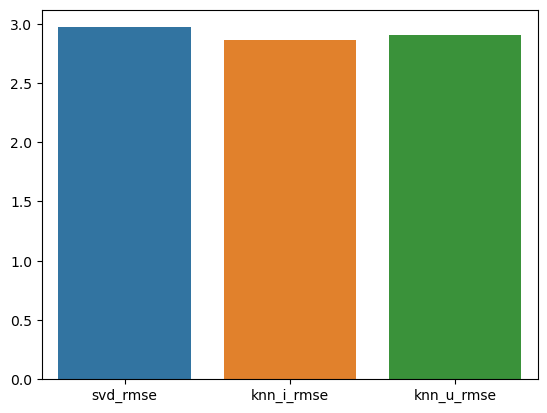

In [74]:
sns.barplot(x=['svd_rmse','knn_i_rmse', 'knn_u_rmse'],y=[svd_rmse,knn_i_rmse, knn_u_rmse]);

In [75]:
# Q6

For svd :-

In [76]:
svd_pred_df=pd.DataFrame(svd_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',svd_pred_df['est'].mean())
print('average rating  by test users: ',svd_pred_df['rui'].mean())
print('average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

average prediction for test users:  7.800217805179583
average rating  by test users:  7.850823647462162
average prediction error for test users:  2.3044087829916013


For item-based collaborative filtering :-

In [77]:
knn_i_pred_df=pd.DataFrame(knn_i_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_i_pred_df['est'].mean())
print('average rating  by test users: ',knn_i_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_i_pred_df['rui']-knn_i_pred_df['est']).abs().mean())

average prediction for test users:  7.760249631382037
average rating  by test users:  7.850823647462162
average prediction error for test users:  2.252437466152665


For User-based collaborative filtering :-

In [78]:
knn_u_pred_df=pd.DataFrame(knn_u_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_u_pred_df['est'].mean())
print('average rating  by test users: ',knn_u_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_u_pred_df['rui']-knn_u_pred_df['est']).abs().mean())

average prediction for test users:  7.787064696309136
average rating  by test users:  7.850823647462162
average prediction error for test users:  2.2535722447411337


In [79]:
# Q7

1 . Both knn_i(item-based) and knn_u(user-based) have roughly similar RMSE

2 . Most of the authors have given the rating of '10' or '8'

3 . Overall data is highly skewed towards 'Amazon customers'. This may also be because 'Amazon' is the biggest trader for phones in the world.

4 . Most popular phone (rated 10 by highest number of people):
 * Overall: verykool t742
 * Amongst top users: samsung e1120   

In [80]:
# Q8 :- recommend top 5 products for test users

In [81]:
# Objective: To get top_n recommendation for each user
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [82]:
%%time
top_5 = get_top_n(knn_i_pred,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n')

Top 5 recommendations for all test users are: 

Luca ->  [('huawei p8 lite 2017', 9.54580999682166), ('motorola c975', 9.355991319296889), ('huawei ascend mate 7', 9.338604166135665), ('huawei ascend mate', 9.335522032799714), ('huawei g610', 9.236829921101211)] 

Andre ->  [('motorola moto g', 9.403306327732883), ('nokia 1200', 8.533290535169897), ('samsung gt b2100', 8.499674037906336), ('samsung galaxy s iii neo i9300i', 8.166709202945546), ('huawei ascend p1', 8.064538546389953)] 

Samuel ->  [('htc first', 10), ('lg g2 594708', 9.716274423343407), ('blackberry passport', 9.431273565204009), ('samsung sgh e635 sgh e630', 9.319522951000842), ('lg d686 g pro lite dual', 8.989221846729466)] 

Cliente Amazon ->  [('lg k500n', 10), ('huawei nova', 9.641332610208144), ('huawei shotx', 9.563625646324985), ('samsung s5611', 9.111330722972106), ('htc desire eye m910x', 9.056065934146138)] 

Barbara ->  [('lg dare vx9700', 10), ('alcatel one touch idol 2 mini', 9.82098153007786), ('motorola 

In [83]:
# Q9

Cross-validation for svd :-

In [84]:
%%time
svd_cv = cross_validate(svd,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean svd cv score:', round(svd_cv['test_rmse'].mean(),2),'\n')
svd_cv


 Mean svd cv score: 2.96 

CPU times: total: 5.89 s
Wall time: 5.91 s


{'test_rmse': array([2.96906035, 2.94828295, 2.95819136, 2.96591436, 2.93652356]),
 'fit_time': (0.8975930213928223,
  0.9155476093292236,
  0.8896262645721436,
  0.9095652103424072,
  0.9096536636352539),
 'test_time': (0.11768603324890137,
  0.23134493827819824,
  0.14760446548461914,
  0.11569094657897949,
  0.11768317222595215)}

Cross-validation for knn_item_based collaborative model :-

In [85]:
%%time
knn_i_cv = cross_validate(knn_i,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_i_cv score:', round(knn_i_cv['test_rmse'].mean(),2),'\n')
knn_i_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_i_cv score: 2.86 

CPU times: total: 46.6 s
Wall time: 46.6 s


{'test_rmse': array([2.8487158 , 2.86703988, 2.86072895, 2.85402044, 2.84734954]),
 'fit_time': (3.760922431945801,
  3.731019973754883,
  3.8088109493255615,
  3.717055320739746,
  3.751962423324585),
 'test_time': (5.547161340713501,
  5.456603765487671,
  5.297048091888428,
  5.414515256881714,
  5.476350545883179)}

Cross-validation for knn_user_based collaborative model:-

In [86]:
%%time
knn_u_cv = cross_validate(knn_u,revs50_, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean knn_u_cv score:', round(knn_u_cv['test_rmse'].mean(),2),'\n')
knn_u_cv

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_u_cv score: 2.89 

CPU times: total: 20.7 s
Wall time: 20.9 s


{'test_rmse': array([2.8990337 , 2.88910706, 2.89451553, 2.91062923, 2.86762365]),
 'fit_time': (1.4084663391113281,
  1.3876631259918213,
  1.4329349994659424,
  1.4251854419708252,
  1.4600558280944824),
 'test_time': (2.543240547180176,
  2.6878230571746826,
  2.4863529205322266,
  2.626971960067749,
  2.7311642169952393)}

Thus, for cv scores too, knn_item_based is giving a better performance

In [87]:
# Q10

Popularity based recommendation systems can be used in scenarios like :-

1. Can be used to recommend for the first time user even without knowing any personal information of that user.(which sometimes help us to retain customer).

2. Genearally used in cases where we don't have user and item data.

3. Follow contemporary trends in different sectors.

4. Used to show most popular items in different categories(or websites) along with personalized results like:-

      - Most popular news
      
      - Most popular english songs on music website/app
      
      - Most popular trend in traditional or western wear
      
      - Most popular movies and Tv shows on movies app

In [88]:
# Q11

Collaborative filtering is useful in scenarios like:-

- To give personalised recommendation to the user, where user history or item data/features is available

- Personalized movie recommendation of movie sites like Netflix, Amazon Prime, Youtube etc

- Personalized beauty products recommendation in sites like nykaa, myglamm etc

- Amazon and Flipkart  use item-based recommendation systems to recommend similar items or products to users by filtering     them with the help of a user's past interactive data

- Facebook uses Collaborative Filtering to recommend people you might know, groups you might want to follow,

In [89]:
# Q12


 Improving recommendations for different users:-
 
- Other from Popularity and Collaborative Filtering, hybrid recommendation methods like Content+Collaborative method, Demographic, Utility based, and Knowledge based recommendation system can also be used.
- Ditching User-Based Collaborative Filtering Model - To tackle data sparsity and scalability.
- Boosting Algorithm Using Model Size.
 improve the recommendation for different users.